In [4]:
import sys
import os
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

os.chdir('Project')

print(os.getcwd())

/scratch/user/tommyztx/Project


Read all files

In [22]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader("Cali_Files")

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:05<00:00, 42.86it/s]


View Calltree

In [6]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

12.048 main
├─ 1.022 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.411 comm
│  ├─ 0.266 comm_large
│  │  └─ 0.070 MPI_Gather
│  └─ 0.145 comm_small
│     └─ 0.145 MPI_Scatter
├─ 9.964 comp
│  └─ 9.964 comp_large
├─ 0.192 correctness_check
└─ 0.179 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 12.05 indices: {'profile': 9498526})
█ 10.84 - 12.05
█ 8.43 - 10.84
█ 6.02 - 8.43
█ 3.61 - 6.02
█ 1.20 - 3.61
█ 0.00 - 1.20

name User code    ◀  Only in left graph    ▶  Only in right graph



In [10]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,group_num,implementation_source,scalability
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9498526,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_Sorted_67108864_2.cali,true,true,true,true,1729556572,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, Sorted, 67108864]",c,radix,mpi,unsigned int,4,67108864,Sorted,2,10,handwritten,strong or weak?
49430760,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_1_perc_perturbed_1048576_512....,true,true,true,true,1729563868,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, 1_perc_perturbed, 1048576]",c,radix,mpi,unsigned int,4,1048576,1_perc_perturbed,512,10,handwritten,strong or weak?
71873232,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_Sorted_268435456_8.cali,true,true,true,true,1729556587,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, Sorted, 268435456]",c,radix,mpi,unsigned int,4,268435456,Sorted,8,10,handwritten,strong or weak?
79954216,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_Random_268435456_512.cali,true,true,true,true,1729613381,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, Random, 268435456]",c,radix,mpi,unsigned int,4,268435456,Random,512,10,handwritten,strong or weak?
80998503,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_Random_262144_2.cali,true,true,true,true,1729144250,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, Random, 262144]",c,radix,mpi,unsigned int,4,262144,Random,2,10,handwritten,strong or weak?
90811745,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_Sorted_1048576_8.cali,true,true,true,true,1729556512,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, Sorted, 1048576]",c,radix,mpi,unsigned int,4,1048576,Sorted,8,10,handwritten,strong or weak?
103410609,2.11.0,256,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_1_perc_perturbed_262144_256.cali,true,true,true,true,1729557924,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, 1_perc_perturbed, 262144]",c,radix,mpi,unsigned int,4,262144,1_perc_perturbed,256,10,handwritten,strong or weak?
124895059,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_1_perc_perturbed_65536_64.cali,true,true,true,true,1729559455,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, 1_perc_perturbed, 65536]",c,radix,mpi,unsigned int,4,65536,1_perc_perturbed,64,10,handwritten,strong or weak?
125533443,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,Cali_Files/radix_Random_268435456_8.cali,true,true,true,true,1729144340,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./sort, radix, Random, 268435456]",c,radix,mpi,unsigned int,4,268435456,Random,8,10,handwritten,strong or weak?


Group Performance data by `matrix_size` in the Thicket metadata table.

In [23]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()


In [25]:
tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  3813358037   
                                                          Random            1687696451   
                                                          ReverseSorted     3230724970   
                                                          Sorted             241018647   
                                               262144     1_perc_perturbed  3186695447   

                                                                            nid  \
node                                 num_procs input_size input_type              
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  1.0   
                                                          Random            1.0   
                                                          ReverseSorted     1.0   
                                                          Sorted            1.0   
                                               262144     1_perc_perturbed  1.0   

                                                                             spot.channel  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  regionprofile   
                                                          Random            regionprofile   
                                                          ReverseSorted     regionprofile   
                                                          Sorted            regionprofile   
                                               262144     1_perc_perturbed  regionprofile   

                                                                            Min time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.327257   
                                                          Random                 0.325213   
                                                          ReverseSorted          0.368518   
                                                          Sorted                 0.377003   
                                               262144     1_perc_perturbed       0.353389   

                                                                            Max time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.327288   
                                                          Random                 0.325222   
                                                          ReverseSorted          0.369586   
                                                          Sorted                 0.385005   
                                               262144     1_perc_perturbed       0.353401   

                                                                            Avg time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.327273   
                                                          Random                 0.325218   
                                                          ReverseSorted          0.369052   
                                                          Sorted                 0.381004   
                                               262144     1_perc_perturbed       0.353395   

                                                                            Total time  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed    

In [32]:
# Define common variables
input_types = ["1_perc_perturbed", "Sorted", "Random", "ReverseSorted"]
processes = [2, 4, 8, 16, 32, 64, 128, 512]
input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

In [26]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


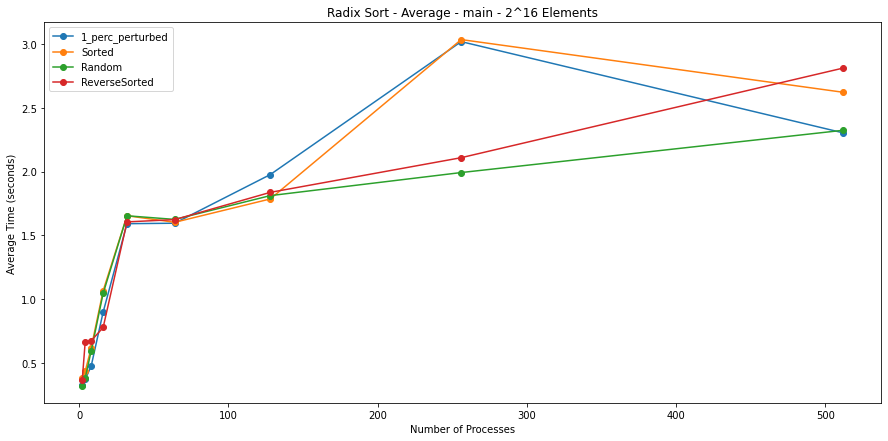

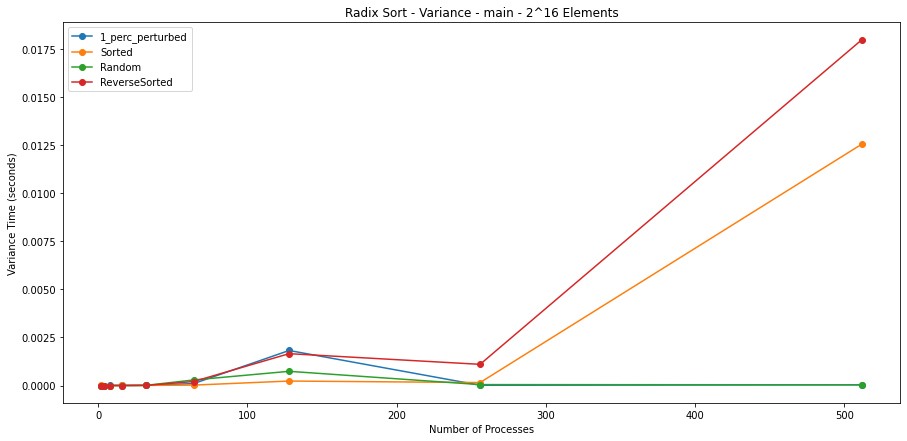

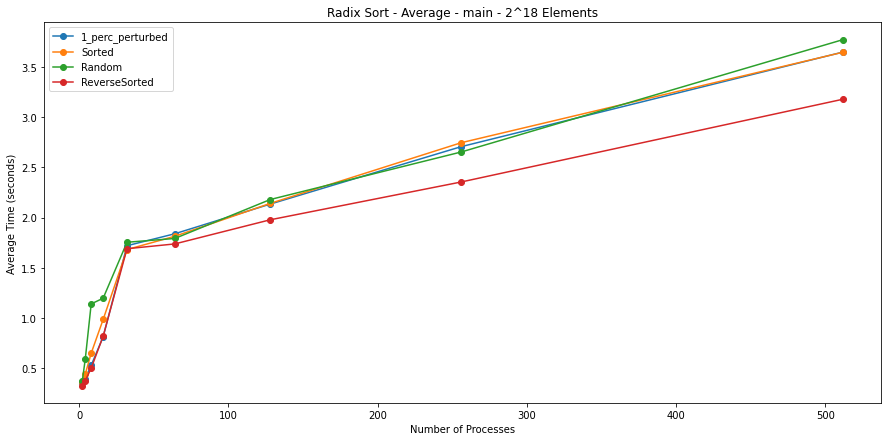

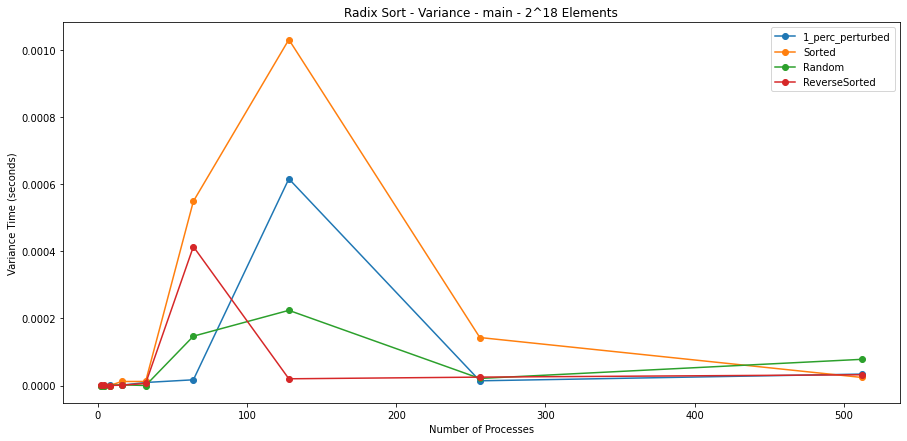

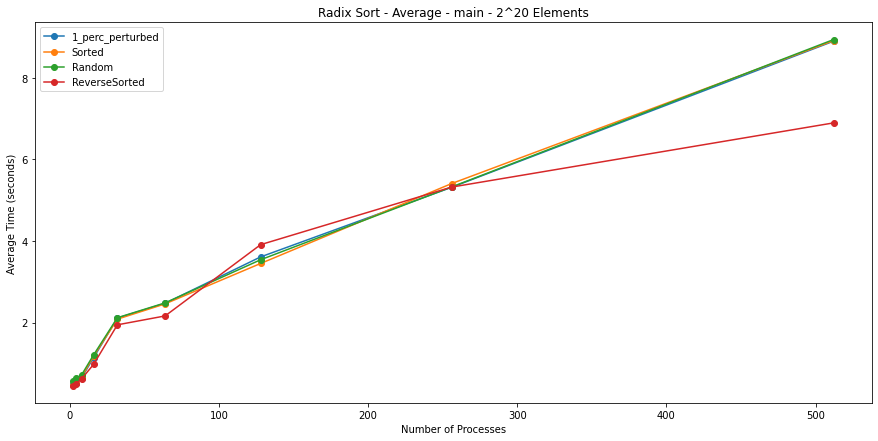

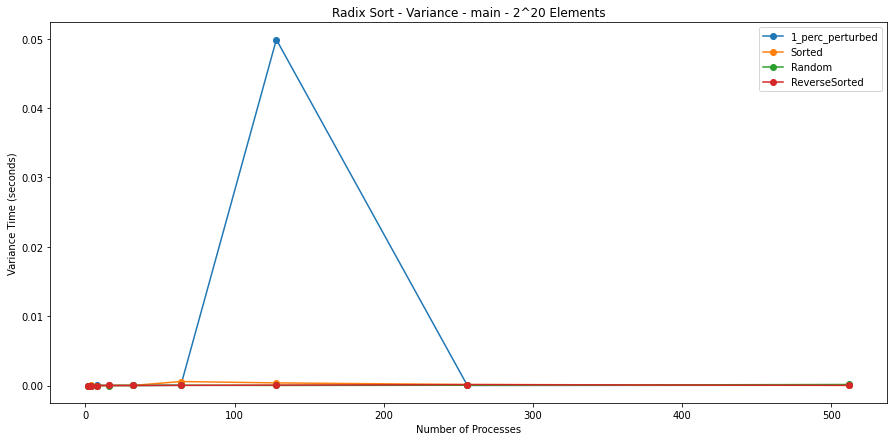

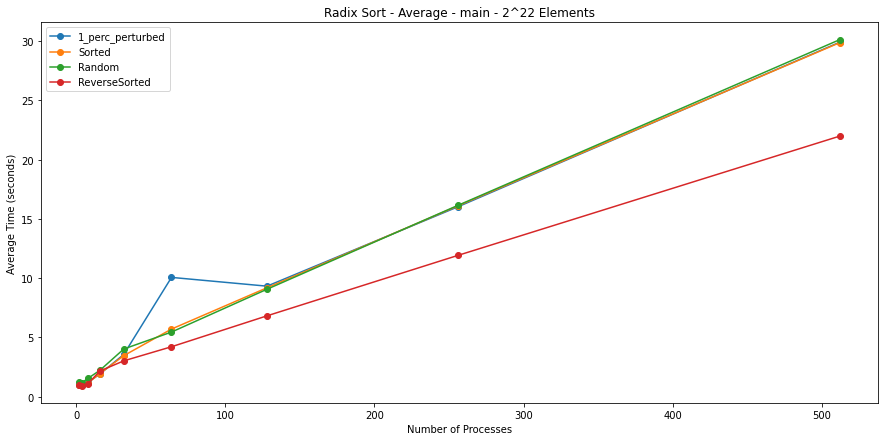

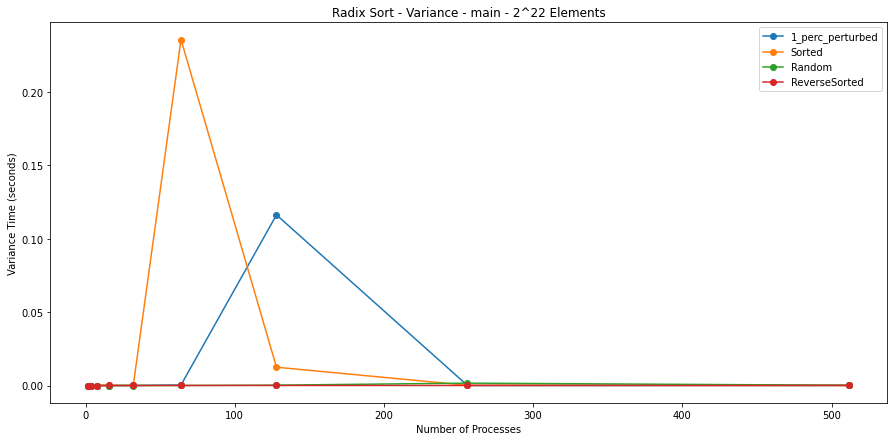

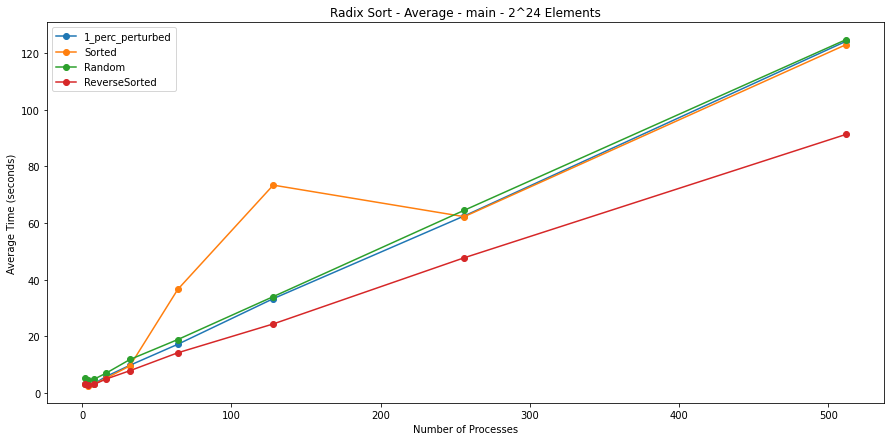

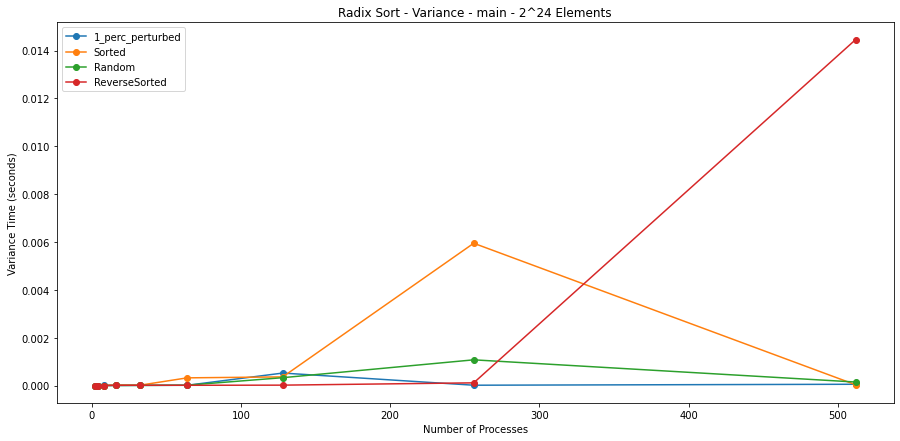

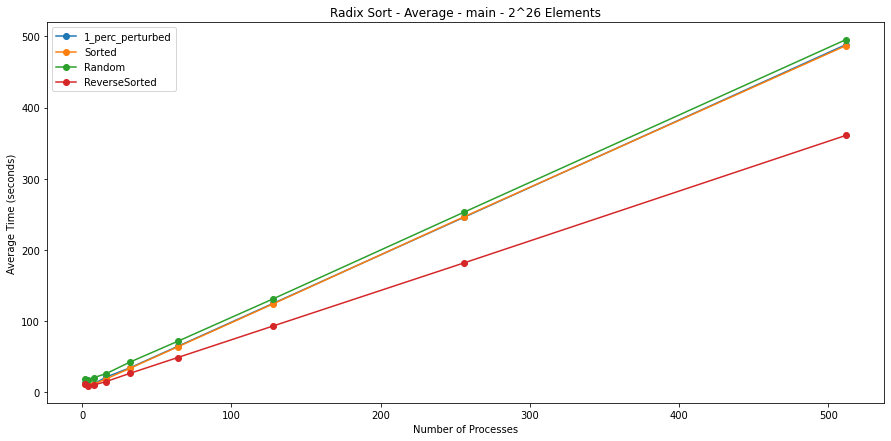

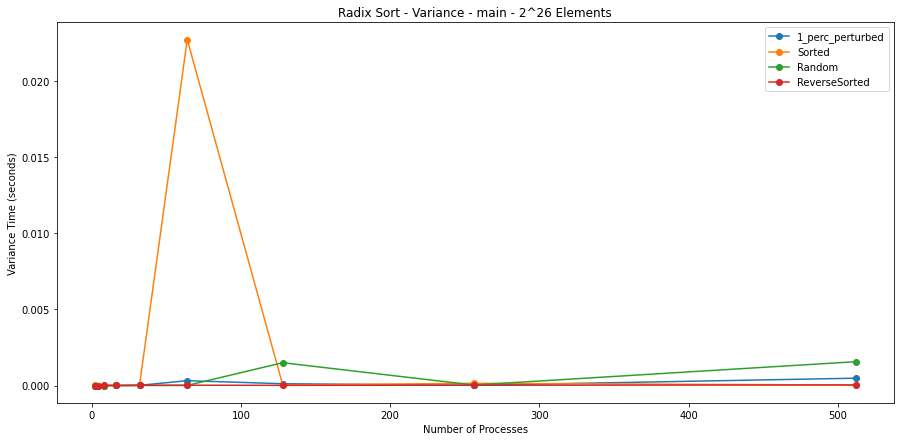

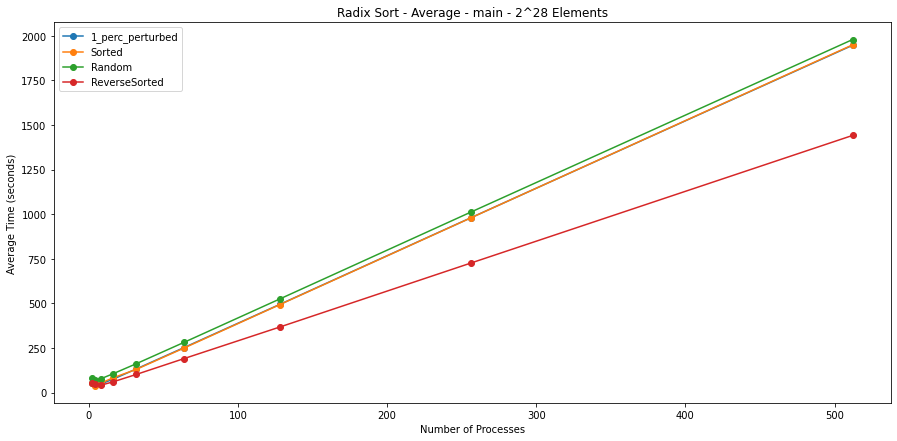

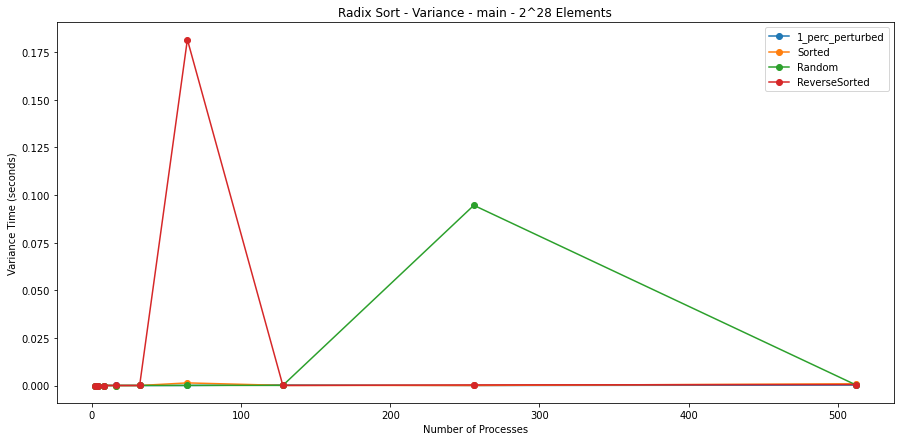

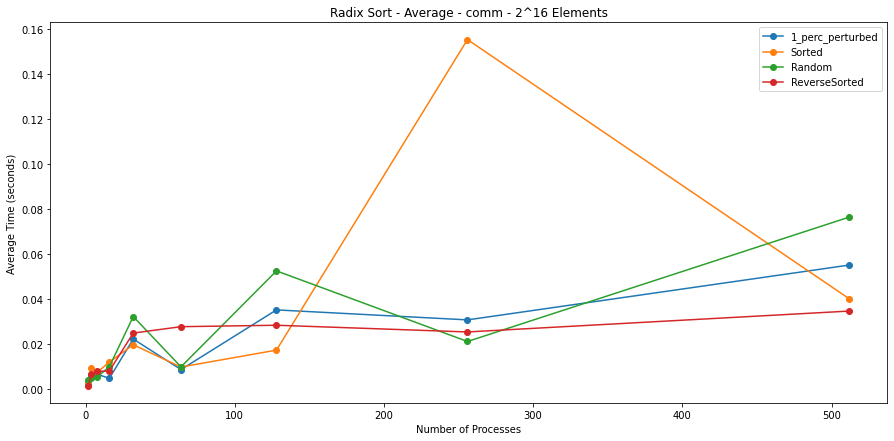

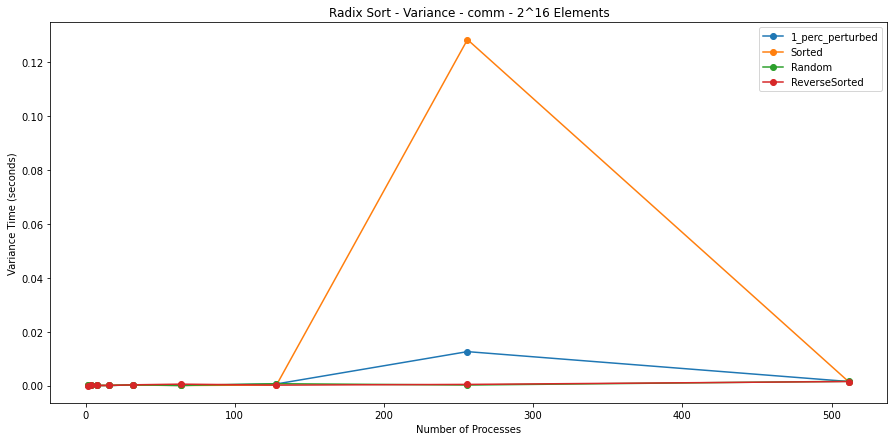

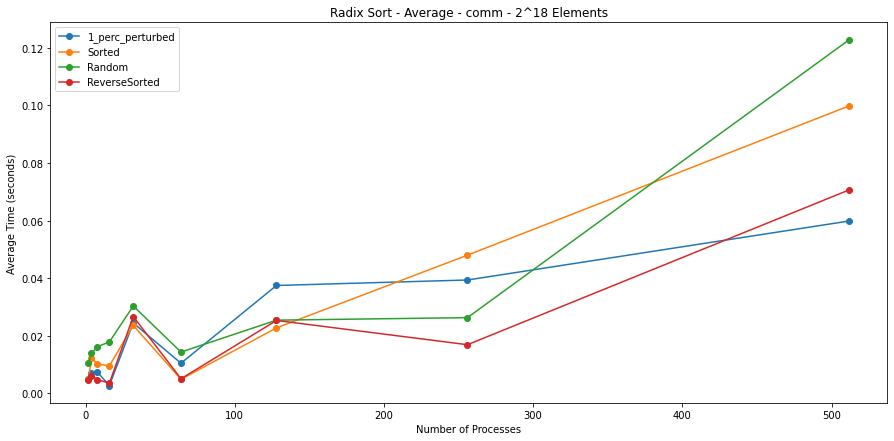

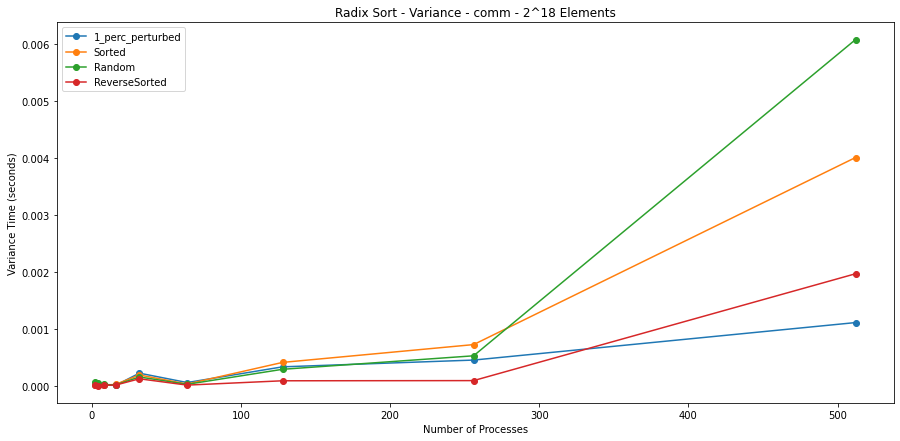

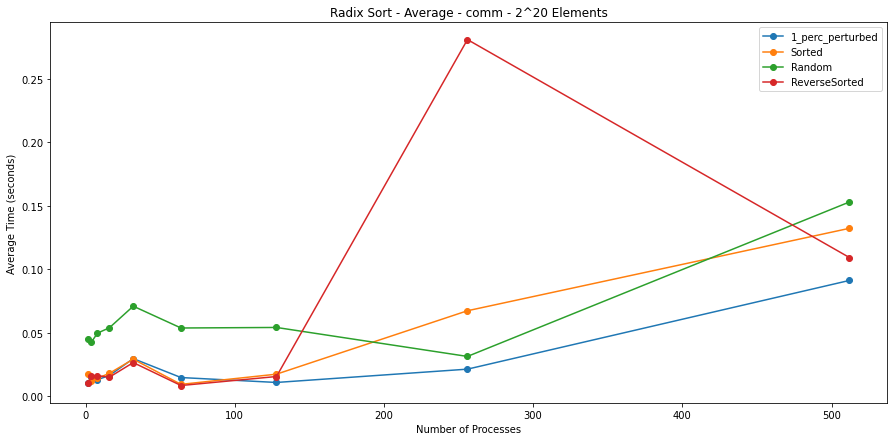

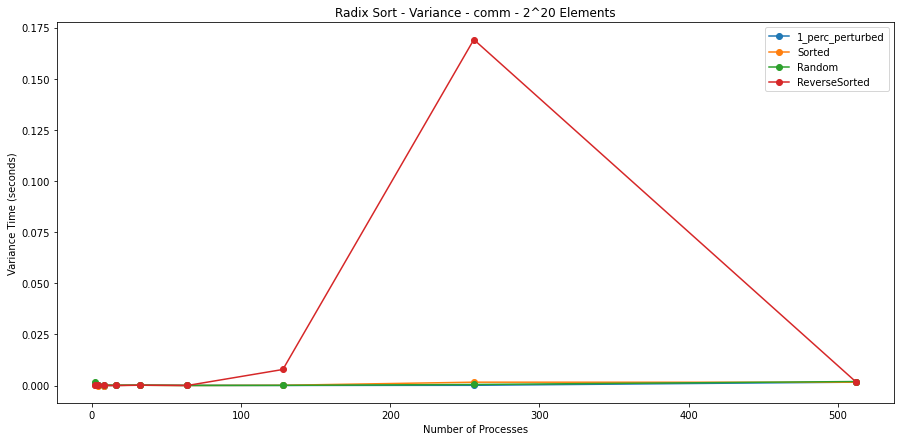

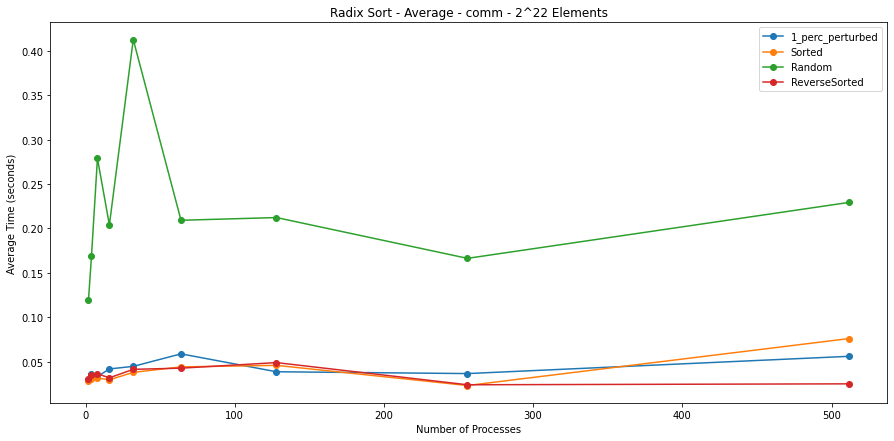

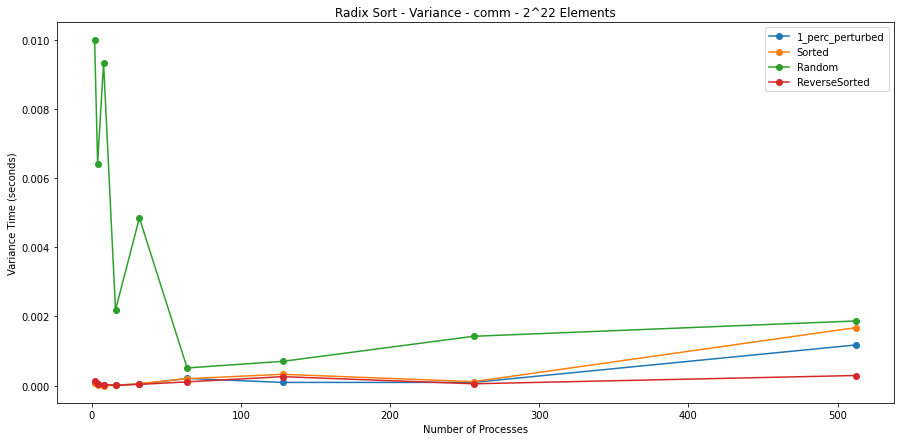

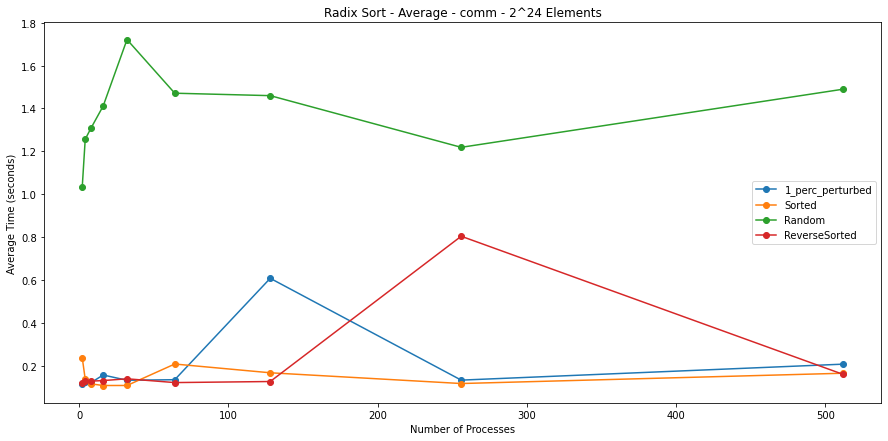

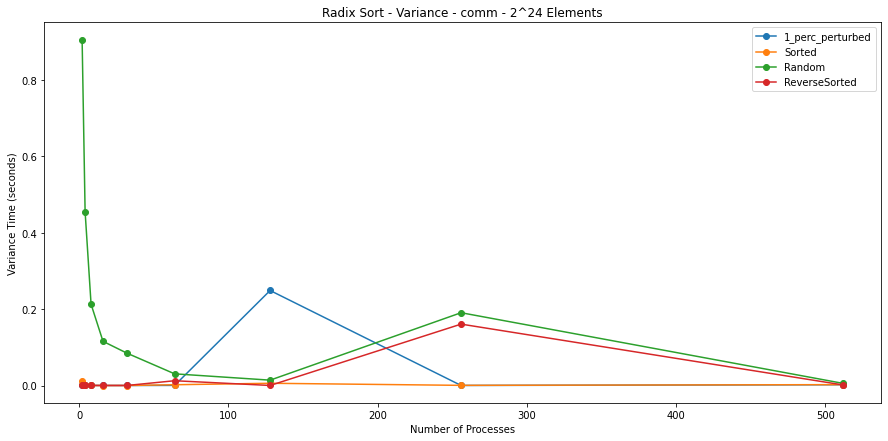

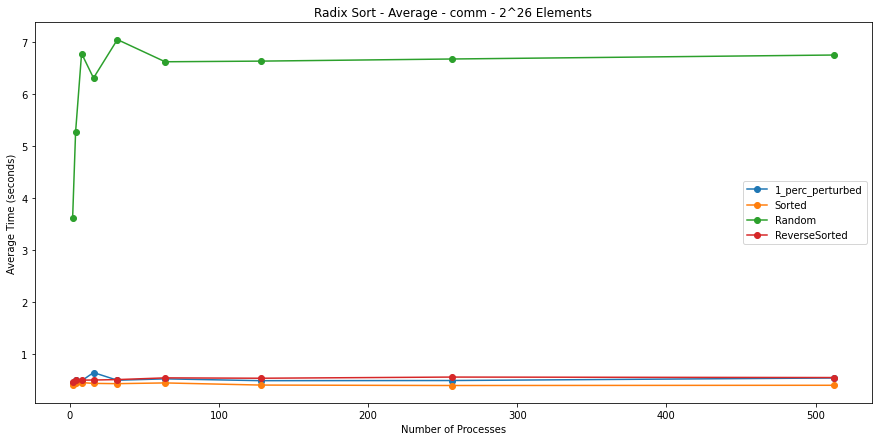

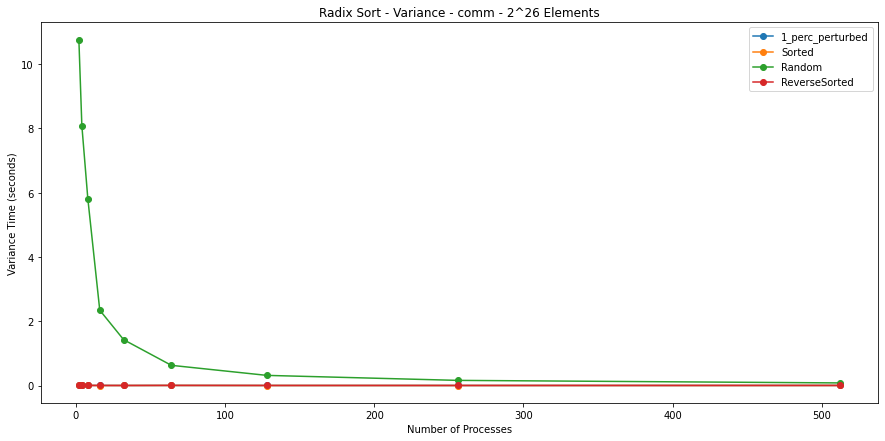

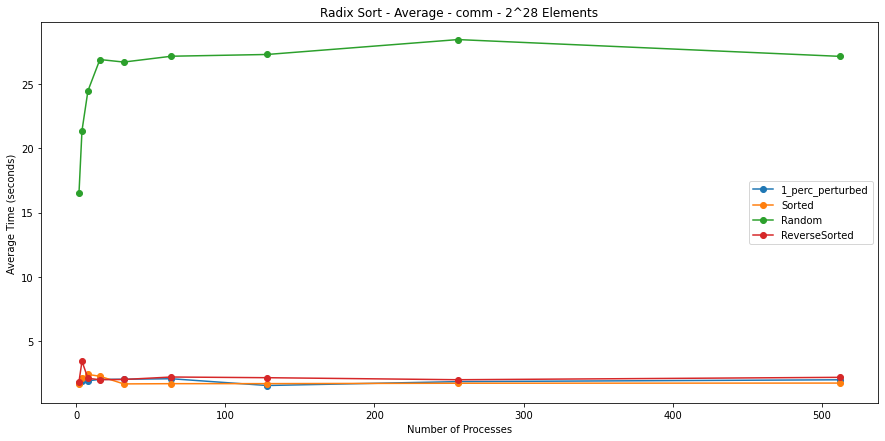

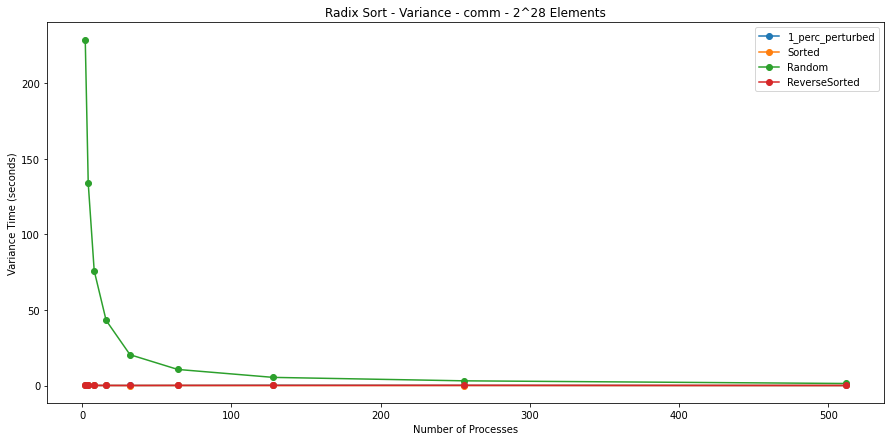

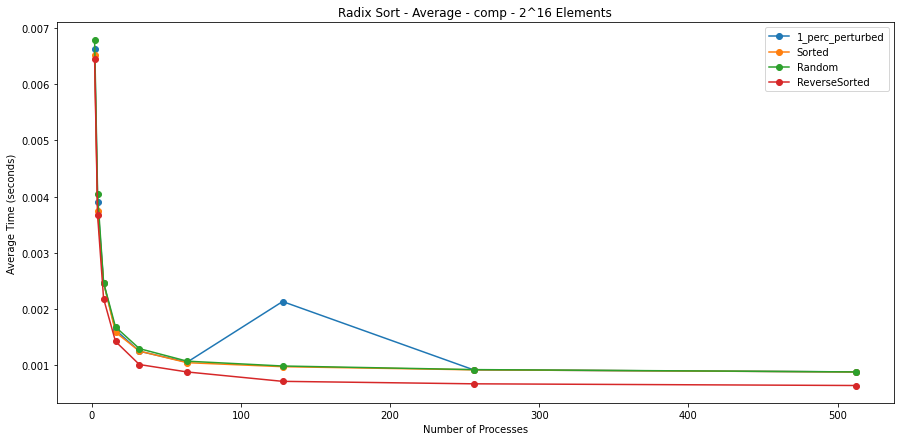

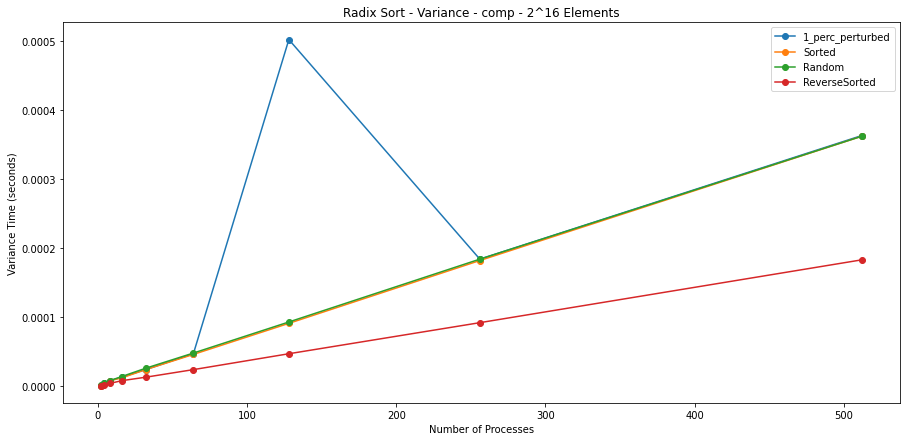

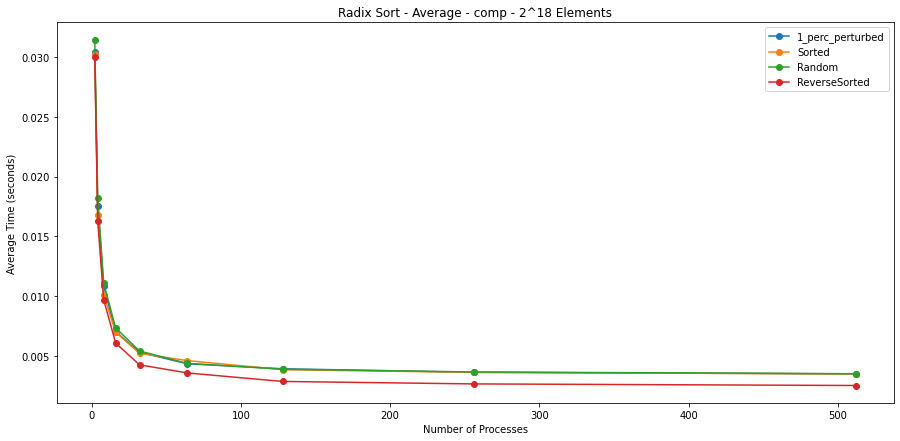

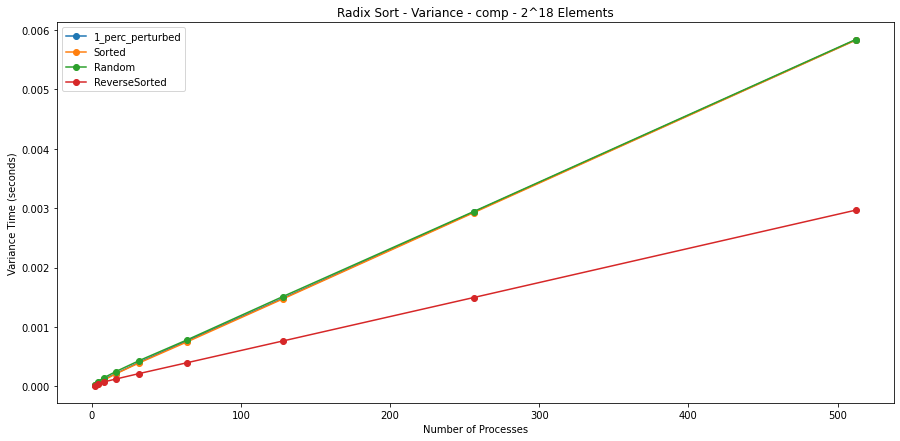

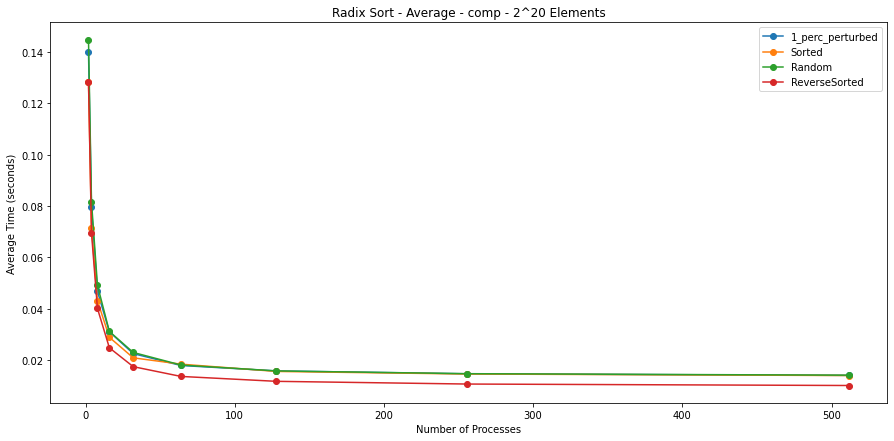

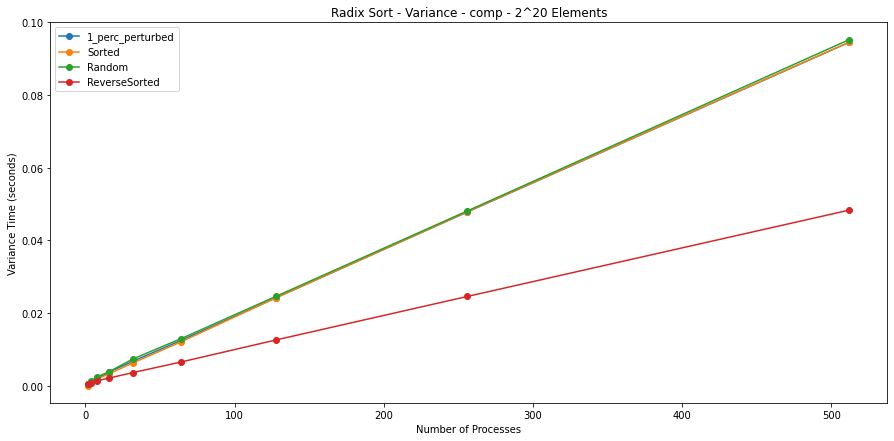

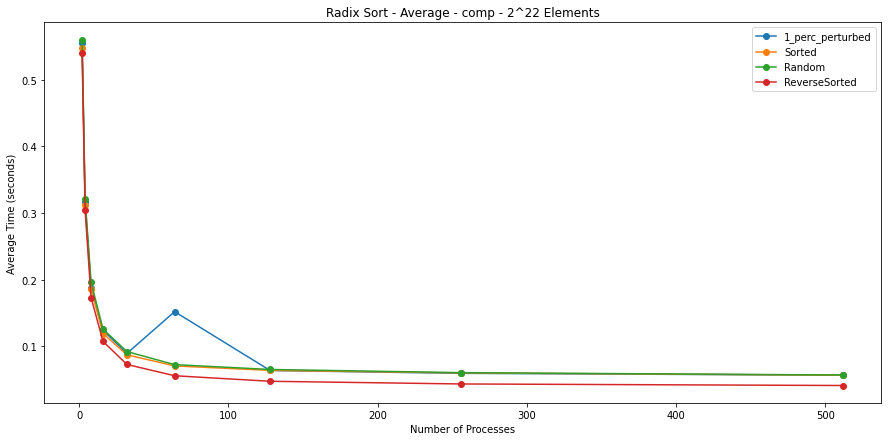

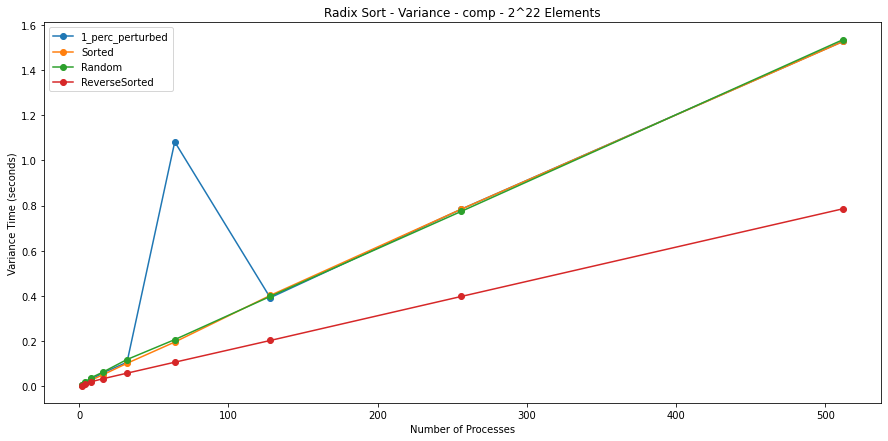

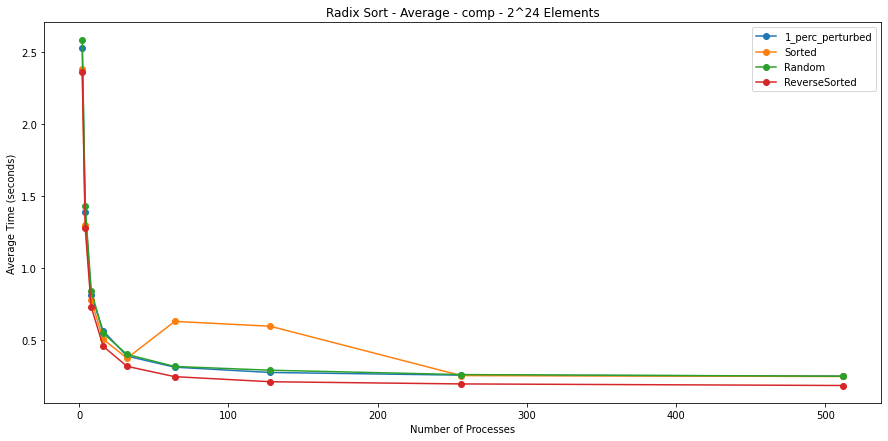

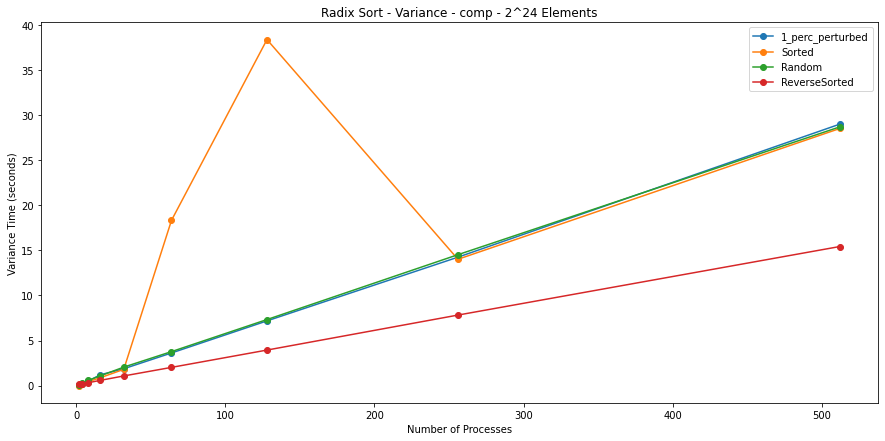

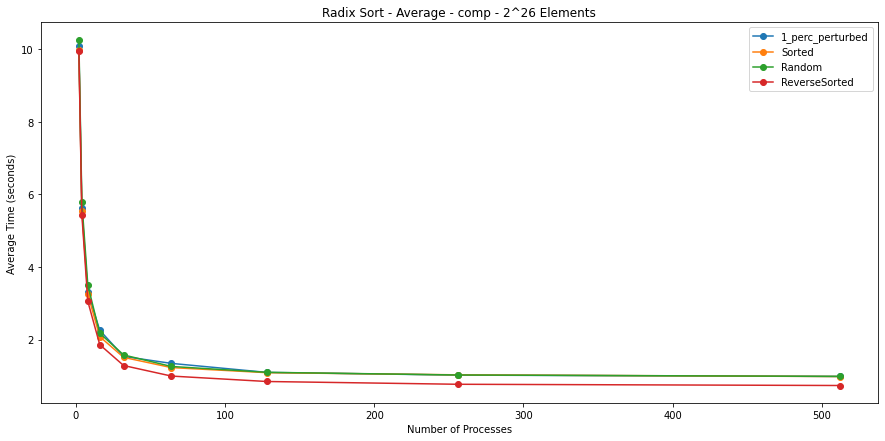

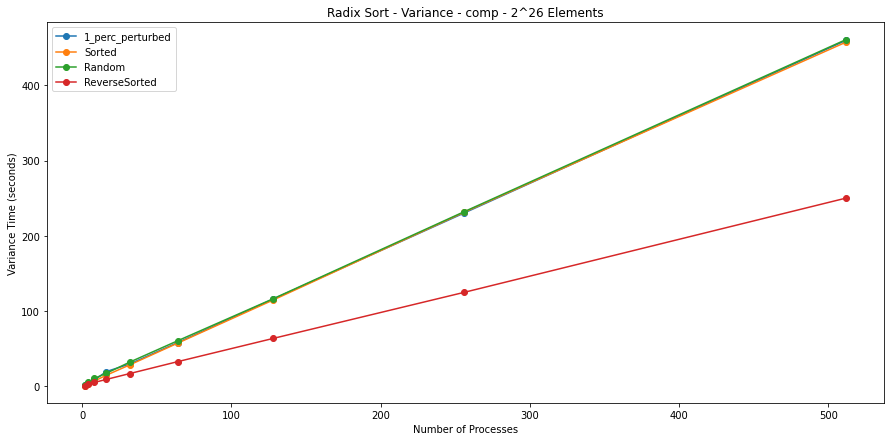

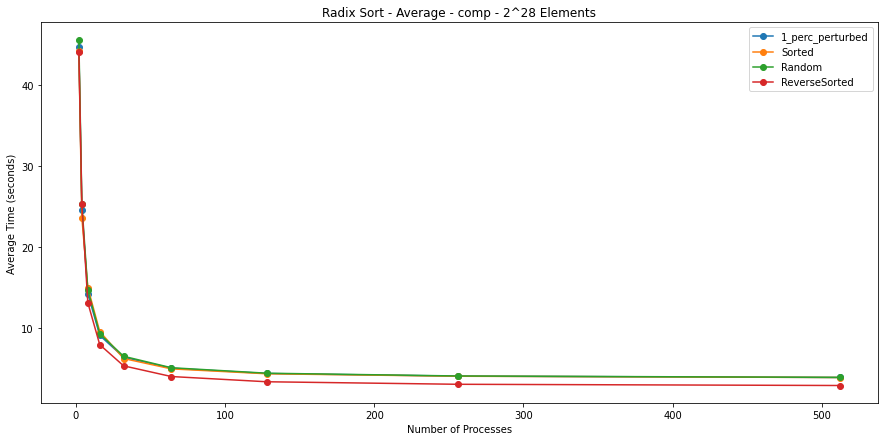

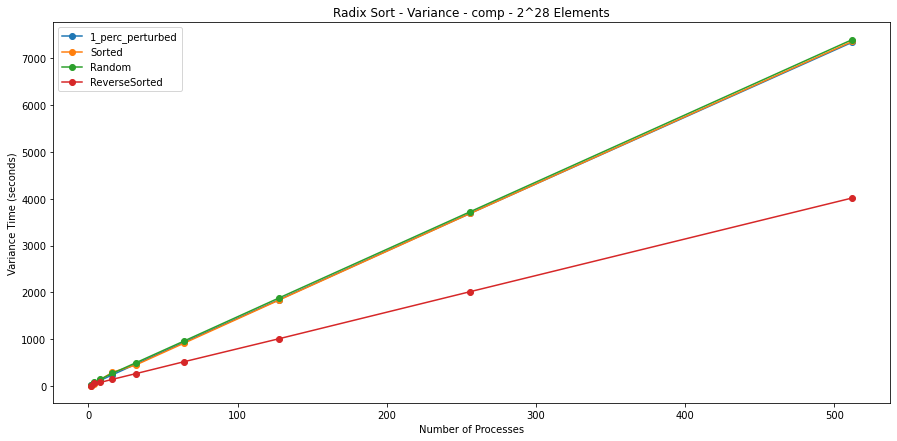

In [34]:
from math import log2

def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

important_names = ["comm", "comp" , "main"]

# Strong Scaling
for node in tk.graph.traverse():
    if node.frame["name"] not in important_names:
        continue

    node_df = tk.dataframe.loc[node, ["Min time/rank", "Max time/rank", "Avg time/rank", "Variance time/rank"]].unstack(level="input_size").unstack(level="input_type")
    for input_size in input_sizes:
        region_name = node.frame["name"]
        mat_df = node_df[[("Avg time/rank", input_size, input_types[0]), ("Avg time/rank", input_size, input_types[1]),
                          ("Avg time/rank", input_size, input_types[2]), ("Avg time/rank", input_size, input_types[3])]]
        mat_df.columns = input_types
        input_size_exp = int(log2(input_size))

        avg_plot = plot_pandas(
            df=mat_df,
            title=f"Radix Sort - Average - {region_name} - 2^{input_size_exp} Elements",
            xlabel="Number of Processes",
            ylabel="Average Time (seconds)",
        )

        mat_df = node_df[[("Variance time/rank", input_size, input_types[0]), ("Variance time/rank", input_size, input_types[1]),
                          ("Variance time/rank", input_size, input_types[2]), ("Variance time/rank", input_size, input_types[3])]]
        mat_df.columns = input_types
        var_plot = plot_pandas(
            df=mat_df,
            title=f"Radix Sort - Variance - {region_name} - 2^{input_size_exp} Elements",
            xlabel="Number of Processes",
            ylabel="Variance Time (seconds)",
        )

        avg_plot
        var_plot

        avg_fig = avg_plot.get_figure()
        avg_fig.savefig(f"Graphs/Radix_Average_{region_name}_2^{input_size_exp}")
        var_fig = var_plot.get_figure()
        var_fig.savefig(f"Graphs/Radix_Variance_{region_name}_2^{input_size_exp}")